In [0]:
 import pandas as pd
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
df = pd.read_csv('dataset_model.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
 Outlier Detection & Handling & messing values and removing

In [0]:
Var = [i for i in df.columns if df[i].unique().size == df.shape[0]]
df = df.drop(uni_Var, axis=1)

In [0]:
tar= df['Loan_Status']
df = df.drop(columns='Loan_Status')

In [0]:
cont_data = df._get_numeric_data().columns
cont_data = cont_data.drop(['Loan_Amount_Term', 'Credit_History'])
cat_data = list(set(df.columns) - set(cont_data))

In [0]:
thrs = 3
out = []
for i in cont_data:
  out.clear()
  print(i)
  mean = np.mean(df[i])
  std = np.std(df[i])
  for j in df[i]:
    z = (j - mean)/std
    if np.abs(z) > thrs:
      out.append(z)
  print(out)
#We consider a variable as a outlier if it lies outside of third standard deviation of the column.

ApplicantIncome
[3.0143095050697597, 5.667623383716305, 7.594863718885357, 4.659606571212465, 5.528044263896173, 9.490977255033487, 12.384622787173148, 5.294101795465248]
CoapplicantIncome
[3.1967125462128783, 3.3102609013326325, 6.285775026458728, 6.285775026458728, 11.018210537880542, 13.696173250494027]
LoanAmount
[5.8888825374459675, 5.304189848804997, 6.473575226086938, 4.076335202658959, 3.3863978300626143, 3.900927396066668, 4.017865933794862, 4.953374235620415, 3.023888363105213, 4.134804471523056, 3.900927396066668, 3.900927396066668, 5.304189848804997, 4.088029056431779]


In [0]:
df_w = df.copy()
df_w[cont_data].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,267.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


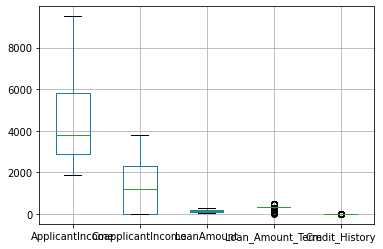

In [0]:
 for i in cont_data:
  df_w[i] = mstats.winsorize(df_w[i], limits=[0.05,0.1])
df_w.boxplot()
df_w.head()

In [0]:
 df_w[cont_data].skew()

ApplicantIncome      0.984008
CoapplicantIncome    0.522653
LoanAmount           0.760708
dtype: float64

In [0]:
miss_data=[]
for i in df_w.columns:
  if df_w[i].isnull().sum() > 0:
    miss_data.append(i)
miss_data.remove('Loan_Amount_Term')
miss_data

['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

In [0]:
 for i in miss_data:
  df_w[i] = df_w[i].fillna(df_w[i].mode()[0])
df_w[miss_data]
df_w['Loan_Amount_Term'] = df_w['Loan_Amount_Term'].fillna(df_w['Loan_Amount_Term'].interpolate())
df_w.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,267.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [0]:
 
Use Label Encoder as encoding technique on features , predict using below algorithms
1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -Precision, Recall, F1 Score & AUROC

In [0]:
lE = LabelEncoder()
en_Var = pd.DataFrame(lE.fit_transform(tar))
en_Var.columns =(['Loan_Status'])
en_Var.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [0]:
df_lE = df_w.copy()
df_lE.shape

(614, 11)

In [0]:
 for i in cat_data:
  df_lE[i] = lE.fit_transform(df_lE[i])
df_lE.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,267.0,10,1,2
1,1,1,1,0,0,4583,1508.0,128.0,10,1,0
2,1,1,0,0,1,3000,0.0,66.0,10,1,2
3,1,1,0,1,0,2583,2358.0,120.0,10,1,2
4,1,0,0,0,0,6000,0.0,141.0,10,1,2


In [0]:
 df_lE.shape

(614, 11)

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(df_lE, en_Var, test_size=0.20, random_state=42, stratify=en_Var)

In [0]:
log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
 para=[{
       'multi_class':['auto','ovr', 'multinomial'],
       'class_weight':['Balanced'],
       'l1_ratio' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       'dual':[True, False],
       'max_iter':[50,100,200,250, 1000]}
      ]
 
SCV = RandomizedSearchCV(log, param_distributions=para, n_iter=50, cv=4, n_jobs=-1)
 
SCV.fit(X_train, y_train)
pred1 = SCV.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
 print("Confusion Matrix:\n"+str(confusion_matrix(y_test, pred1)))
print("Accuracy of Dtree Model:")
print("%.2f"%round(accuracy_score(y_test, pred1)*100,2) + '%')
print("Precision of DTree Model:")
print ("%.2f" % round(precision_score(y_test, pred1)*100) + '%')
print ("Recall of DTree Model:" )
print("%.2f" % round(recall_score(y_test, pred1)*100) + '%')
print ("F1 Score of DTree Model:")
print ("%.2f" % round(f1_score(y_test, pred1)*100) + '%')

Confusion Matrix:
[[21 17]
 [ 1 84]]
Accuracy of Dtree Model:
85.37%
Precision of DTree Model:
83.00%
Recall of DTree Model:
99.00%
F1 Score of DTree Model:
90.00%


In [0]:
 print("AUROC Value:\n"+str(round(roc_auc_score(y_test,pred1)*100)) + '%')

AUROC Value:
77.0%


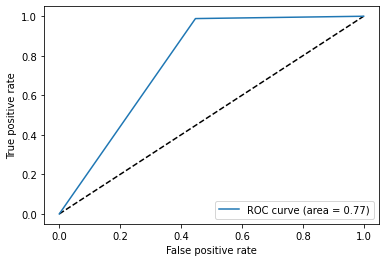

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,pred1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,pred1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [0]:
 
2.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on
Precision ,Recall & F1 Score ,AUROC

In [0]:
FC = RandomForestClassifier(random_state=50)
FC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [0]:
 from scipy.stats import randint
para_FC=[{'n_estimators':[100,200,300,400,500],
       'criterion' : ['gini','entropy'],
       'max_depth' : [2,3,5,10,30,50],
       'bootstrap' : [True,False],
       'min_samples_leaf' : randint(1,4),
       'oob_score' : [True,False],
       'class_weight' : ['balanced', 'balanced-subsample']}]
 
SCV2 = RandomizedSearchCV(rFC, param_distributions=para_rFC, n_iter=40, cv=4, n_jobs=-1)
SCV2.fit(X_train, y_train)
pred2 = SCV2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [0]:
 print("Confusion Matrix:\n"+str(confusion_matrix(y_test, pred2)))
print("Accuracy of Dtree Model:")
print("%.2f"%round(accuracy_score(y_test, pred2)*100,2) + '%')
print("Precision of DTree Model:")
print ("%.2f" % round(precision_score(y_test, pred2)*100) + '%')
print ("Recall of DTree Model:" )
print("%.2f" % round(recall_score(y_test, pred2)*100) + '%')
print ("F1 Score of DTree Model:")
print ("%.2f" % round(f1_score(y_test, pred2)*100) + '%')

Confusion Matrix:
[[23 15]
 [ 1 84]]
Accuracy of Dtree Model:
86.99%
Precision of DTree Model:
85.00%
Recall of DTree Model:
99.00%
F1 Score of DTree Model:
91.00%


AUROC Value:
80.0%


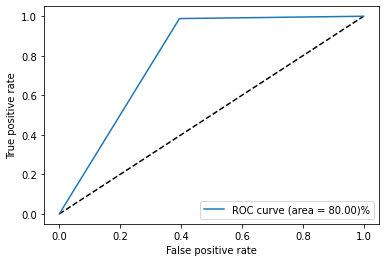

In [0]:
 print("AUROC Value:\n"+str(round(roc_auc_score(y_test,pred2)*100)) + '%')
fpr, tpr, thresholds = roc_curve(y_test,pred2)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% round(roc_auc_score(y_test,pred2)*100) + '%')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [0]:
 
3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -
Precision ,Recall & F1 Score ,AUROC

In [0]:
 df_win_oHE = df_win.copy()
for i in cat_data:
  df_win_oHE = pd.get_dummies(df_win_oHE, columns=[i], prefix=[i])
df_win_oHE.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Credit_History_0.0,Credit_History_1.0,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Married_No,Married_Yes,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_270.0,Loan_Amount_Term_300.0,Loan_Amount_Term_330.0,Loan_Amount_Term_360.0,Loan_Amount_Term_420.0,Loan_Amount_Term_480.0
0,5849,0.0,267.0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4583,1508.0,128.0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3000,0.0,66.0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2583,2358.0,120.0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,6000,0.0,141.0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
 df_win_oHE.shape

(614, 33)

In [0]:
log_reg.fit(X_train_oHE, y_train_oHE)
y_pred3 = log_reg.predict(X_test_oHE)
accuracy_score(y_test_oHE, y_pred3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8536585365853658

In [0]:
 para=[{
       'multi_class':['auto','ovr', 'multinomial'],
       'l1_ratio' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       'penalty':['l1', 'l2', 'elacticnet'],
       'dual':[True, False],
       'max_iter':[50,100,200,250,1000],
       'fit_intercept': [True,False],
       'random_state' : [50]}
      ]
 
rSCV = RandomizedSearchCV(log_reg, param_distributions=para, n_iter=40, cv=5, n_jobs=-1)
 
rSCV.fit(X_train_oHE, y_train_oHE)
y_pred3 = rSCV.predict(X_test_oHE)
accuracy_score(y_test_oHE, y_pred3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8455284552845529

In [0]:
 print("Confusion Matrix:\n"+str(confusion_matrix(y_test_oHE, y_pred3)))
print("Accuracy of Dtree Model:")
print("%.2f"%round(accuracy_score(y_test_oHE, y_pred3)*100,2) + '%')
print("Precision of DTree Model:")
print ("%.2f" % round(precision_score(y_test_oHE, y_pred3)*100) + '%')
print ("Recall of DTree Model:" )
print("%.2f" % round(recall_score(y_test_oHE, y_pred3)*100) + '%')
print ("F1 Score of DTree Model:")
print ("%.2f" % round(f1_score(y_test_oHE, y_pred3)*100) + '%')

Confusion Matrix:
[[21 17]
 [ 2 83]]
Accuracy of Dtree Model:
84.55%
Precision of DTree Model:
83.00%
Recall of DTree Model:
98.00%
F1 Score of DTree Model:
90.00%


AUROC Value:
76.0%


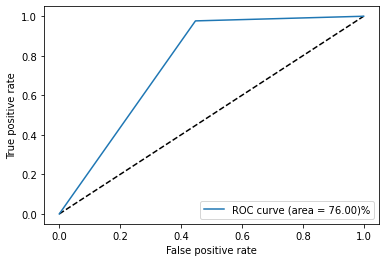

In [0]:
 print("AUROC Value:\n"+str(round(roc_auc_score(y_test_oHE,y_pred3)*100)) + '%')
fpr, tpr, thresholds = roc_curve(y_test_oHE,y_pred3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% round(roc_auc_score(y_test_oHE,y_pred3)*100) + '%')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

In [0]:
 
4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -
Precision ,Recall & F1 Score ,AUROC

In [0]:
rFC.fit(X_train_oHE, y_train_oHE)
y_pred4 = rFC.predict(X_test_oHE)
accuracy_score(y_test_oHE, y_pred4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.8130081300813008

In [0]:
 from scipy.stats import randint
para_rFC=[{'n_estimators':[100,200,300,400,500],
       'criterion' : ['gini','entropy'],
       'max_depth' : [2,3,5,10,30,50],
       'bootstrap' : [True,False],
       'min_samples_leaf' : randint(1,4),
       'oob_score' : [True,False],
       'class_weight' : ['balanced', 'balanced-subsample']}]
 
rSCV2 = RandomizedSearchCV(rFC, param_distributions=para_rFC, n_iter=40, cv=4, n_jobs=-1)
rSCV2.fit(X_train_oHE, y_train_oHE)
y_pred4 = rSCV2.predict(X_test_oHE)
accuracy_score(y_test_oHE,y_pred4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8536585365853658

In [0]:
 print("Confusion Matrix:\n"+str(confusion_matrix(y_test_oHE, y_pred4)))
print("Accuracy of Dtree Model:")
print("%.2f"%round(accuracy_score(y_test_oHE, y_pred4)*100,2) + '%')
print("Precision of DTree Model:")
print ("%.2f" % round(precision_score(y_test_oHE, y_pred4)*100) + '%')
print ("Recall of DTree Model:" )
print("%.2f" % round(recall_score(y_test_oHE, y_pred4)*100) + '%')
print ("F1 Score of DTree Model:")
print ("%.2f" % round(f1_score(y_test_oHE, y_pred4)*100) + '%')

Confusion Matrix:
[[21 17]
 [ 1 84]]
Accuracy of Dtree Model:
85.37%
Precision of DTree Model:
83.00%
Recall of DTree Model:
99.00%
F1 Score of DTree Model:
90.00%


AUROC Value:
77.0%


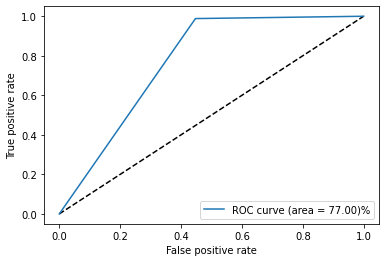

In [0]:
 print("AUROC Value:\n"+str(round(roc_auc_score(y_test_oHE,y_pred4)*100)) + '%')
fpr, tpr, thresholds = roc_curve(y_test_oHE,y_pred4)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% round(roc_auc_score(y_test_oHE,y_pred4)*100) + '%')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')